# Lecture 9: Numpy Arrays Continued

### Last Lecture - review



Numerical operations can be perfomred on Arrays without loops

Easy and efficient! 


In [1]:
import numpy as np
a = 9.8
arr = np.linspace(0, 10, 21)
a*arr

array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ,
       53.9, 58.8, 63.7, 68.6, 73.5, 78.4, 83.3, 88.2, 93.1, 98. ])


Arrays are more rigid than lists

Arrays have a fixed length and fixed data type

In [2]:
# Lists - can start at length 0
myList = []
for i in range(10):
    myList.append(i)
print(myList)

# Arrays - get created at its full length
myArray = np.arange(10)
print(myArray)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0 1 2 3 4 5 6 7 8 9]


## Today - more about 1D Arrays (Vectors)

To get specific elements from your array, you can use an index or a slice of indexes

You can also give in a list or array of indexes

In [3]:
# Make an array
myArray = 2*np.arange(10)
print(myArray)

# Make a list of indexes
indexes = [1, 5, 8]
# Get the elements of the array at those indexes in the form of an array
myArray2 = myArray[indexes]
print('myArray2 =', myArray2)
print('The type of myArray2 is', type(myArray2))

[ 0  2  4  6  8 10 12 14 16 18]
myArray2 = [ 2 10 16]
The type of myArray2 is <class 'numpy.ndarray'>


The indexes need to be integers though

In [4]:
index_floats = [1.0, 5.0]
myArray[index_floats]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Boolean Arrays

Arrays do not have to be made of numbers, they can also be made of booleans, a sequeunce of True's and False's

In [5]:
myBoolArr = np.array([True, False, True])
print(myBoolArr)

[ True False  True]


If converted to numerical values, True is equal to 1 and False is equal to 0

In [7]:
TheArrayOfTruth = np.ones(10, dtype=bool)
print(TheArrayOfTruth)

TheArrayOfLies = np.zeros(10, dtype=bool)
print(TheArrayOfLies)

[ True  True  True  True  True  True  True  True  True  True]
[False False False False False False False False False False]


This also works for sums

In [8]:
myBoolArr = np.array([True, False, True])
print('sum(myBoolArr) =', np.sum(myBoolArr))

sum(myBoolArr) = 2


This lets you count the number of True's in your array

What is the purpose of having an array that can only be one of two options? 

One of the most powerful uses of boolean arrays is to use it to select values from an array, similar to indexing

In [ ]:
MyArr = np.arange(3)
BoolArr = np.array([True, False, True])

MyArr2 = MyArr[BoolArr]
print('MyArr2 =', MyArr2)

Boolean arrays can be created using a conditional statement with an existing array

In [9]:
MyArr = np.arange(10)
print('MyArr = ', MyArr)

BoolArr = MyArr > 4
print('BoolArr = ', BoolArr)

MyArr =  [0 1 2 3 4 5 6 7 8 9]
BoolArr =  [False False False False False  True  True  True  True  True]


The resulting boolean array can then be used to select just the elements you want from the array

In [ ]:
MyArr_gt4 = MyArr[BoolArr]
print('MyArr_gt4 =', MyArr_gt4)

You can also count the number of elements in the array greater than 4

In [ ]:
N_gt4 = np.sum(BoolArr)
print('MyArr has {:d} elements that are greater than 4'.format(N_gt4))

This can be even more helpful when you have more than one array of the same length

Like when we have an array of time and position

In [20]:
# Our function from last class

def distance(t, a = 9.8):
    '''Calculate the distance given a time and acceleration.
       
       Input:  time in seconds <int> or <float>,
               acceleration in m/s^2 <int> or <float>
       Output: distance in m <float>
    '''
    return 0.5 * a * t**2

In [23]:
# Make an array of times
time_arr = np.linspace(0, 10, 21)

# calculate the distances at those times
dist_arr = distance(time_arr)

Now let's find the times where distance is greater than 20 meters

In [ ]:
# Make a boolean array with the same length as dist_arr and that's True where dist_arr is greater than 20
bool_arr = dist_arr>20

# Find the times where dist_arr > 20
times_gt20 = time_arr[bool_arr]
print('The times where distance is greater than 20 m are', times_gt20)

### Exercise 9.1

Create a long array of random numbers to represent some data. 

Find the total number of elements that are greater than 1

Then calculate the fraction of the total number of elements that are greater than 1

In [17]:
# make a long array of random numbers distributed like a bell curve (normally distributed)
data_array = np.random.normal(0,1,10000)
bool_arr = data_array > 1 

In [18]:
print(f"The number of elements greater than one is {np.sum(bool_arr)}.\n")
print(f"The fraction of elements greater than one is {np.sum(bool_arr)/len(data_array)}.\n")

The number of elements greater than one is 1608.

The fraction of elements greater than one is 0.1608.



Multiple Boolean arrays can be used together with the "and" and "or" logic, a lot like normal booleans

In [19]:
print(True and True)
print(True and False)

True
False


In [20]:
bool_arr1 = np.array([True, True])
bool_arr2 = np.array([True, False])
print(np.logical_and(bool_arr1, bool_arr2))

[ True False]


In [21]:
# you can also use the ampersand
print(bool_arr1&bool_arr2)

[ True False]


In [22]:
print(np.logical_or(bool_arr1, bool_arr2))

[ True  True]


In [23]:
# or you can use a pipe
print(bool_arr1|bool_arr2)

[ True  True]


In [24]:
time_arr = np.linspace(0, 10, 21)

# get the times that are great than 2 and less than 5
# first get the times > 2
bool_arr_gt2 = (time_arr>2)
# the times < 5
bool_arr_lt5 = (time_arr<5)

# then get (times > 2) and (times < 5)
bool_arr = (bool_arr_gt2 & bool_arr_lt5)
time_arr[bool_arr]

array([2.5, 3. , 3.5, 4. , 4.5])

You can also get the indexes of where a boolean array is True using np.where()

In [27]:
MyArr = np.linspace(0, 5, 11)
print('MyArr = ', MyArr)

# Get an array of indexes saying where the elements of MyArr are greater than 3
IndexArr = np.where(MyArr > 3)
print(IndexArr[0])
# Though for reasons it returns the array inside of a tuple

MyArr =  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[ 7  8  9 10]


## Making a table like array - structured arrays

Data is often in the form of a table

A table consists of several columns of different parameters (possibly a name for each one) and rows where there is a value for each of those columns. 

This can be approximated by having an array for each column all of equal length

We could try having a 2D array (a Matrix) where the second dimension corresponds to our columns

But there is a more convenient way to structure this in numpy


You can make a custom data type (dtype) that gives a list of dtypes (and even names) to make a structured array

In [28]:
struct_dtype = [('arr1', float), ('arr2', float)]

MyStructArr = np.zeros(4, dtype=struct_dtype)
MyStructArr

array([(0., 0.), (0., 0.), (0., 0.), (0., 0.)],
      dtype=[('arr1', '<f8'), ('arr2', '<f8')])

In [31]:
# A column of the "table"
MyStructArr['arr1']

array([0., 0., 0., 0.])

In [32]:
# The other column of the "table"
MyStructArr['arr2']

array([0., 0., 0., 0.])

In [33]:
# a row of the "table"
print(MyStructArr[0])

(0., 0.)


Now let's make a table of data

In [34]:
# Our function from last class

def distance(t, a = 9.8):
    '''Calculate the distance given a time and acceleration.
       
       Input:  time in seconds <int> or <float>,
               acceleration in m/s^2 <int> or <float>
       Output: distance in m <float>
    '''
    return 0.5 * a * t**2

def velocity(t, a=9.8):
    '''Calculate the velocity given a time and acceleration.
       
       Input:  time in seconds <int> or <float>,
               acceleration in m/s^2 <int> or <float>
       Output: velocity in m/s <float>
    '''
    return a*t

In [35]:
our_dtype = [('time', float), ('dist', float), ('speed', float)]

struct_arr = np.zeros(21, dtype=our_dtype)

# Now let's populate the structrured array

struct_arr['time'] = np.linspace(0, 10, 21)

struct_arr['dist'] = distance(struct_arr['time'])

struct_arr['speed'] = velocity(struct_arr['time'])

time, dist, speed
0.0 0.0 0.0
0.5 1.225 4.9
1.0 4.9 9.8
1.5 11.025 14.700000000000001
2.0 19.6 19.6
2.5 30.625000000000004 24.5
3.0 44.1 29.400000000000002
3.5 60.025000000000006 34.300000000000004
4.0 78.4 39.2
4.5 99.22500000000001 44.1
5.0 122.50000000000001 49.0
5.5 148.22500000000002 53.900000000000006
6.0 176.4 58.800000000000004
6.5 207.025 63.7
7.0 240.10000000000002 68.60000000000001
7.5 275.625 73.5
8.0 313.6 78.4
8.5 354.02500000000003 83.30000000000001
9.0 396.90000000000003 88.2
9.5 442.225 93.10000000000001
10.0 490.00000000000006 98.0


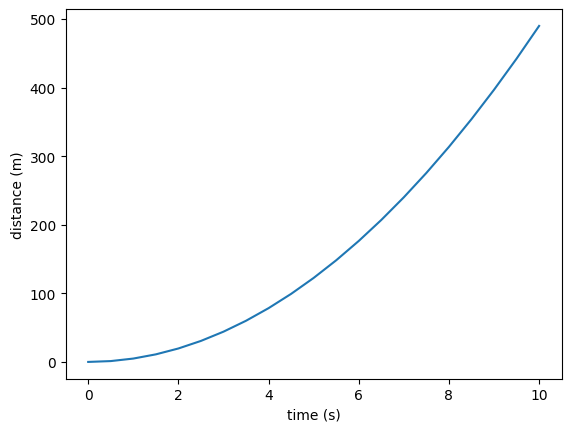

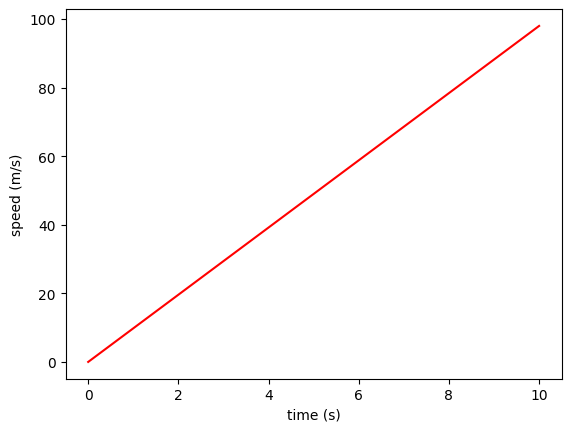

In [42]:
import matplotlib.pyplot as plt

print('time, dist, speed')
for i in range(len(struct_arr)):
    print(struct_arr['time'][i], struct_arr['dist'][i], struct_arr['speed'][i])

plt.plot(struct_arr['time'], struct_arr['dist'], label='distance')
plt.xlabel('time (s)')
plt.ylabel('distance (m)')
plt.show()
plt.plot(struct_arr['time'], struct_arr['speed'], label='speed', color='r')
plt.xlabel('time (s)')
plt.ylabel('speed (m/s)')
plt.show()

What if we do a for loop over struct_arr, what do we get in each iteration?

In [37]:
print('time, dist, speed')
for row in struct_arr:
    print(row['time'], row['dist'], row['speed'])

time, dist, speed
0.0 0.0 0.0
0.5 1.225 4.9
1.0 4.9 9.8
1.5 11.025 14.700000000000001
2.0 19.6 19.6
2.5 30.625000000000004 24.5
3.0 44.1 29.400000000000002
3.5 60.025000000000006 34.300000000000004
4.0 78.4 39.2
4.5 99.22500000000001 44.1
5.0 122.50000000000001 49.0
5.5 148.22500000000002 53.900000000000006
6.0 176.4 58.800000000000004
6.5 207.025 63.7
7.0 240.10000000000002 68.60000000000001
7.5 275.625 73.5
8.0 313.6 78.4
8.5 354.02500000000003 83.30000000000001
9.0 396.90000000000003 88.2
9.5 442.225 93.10000000000001
10.0 490.00000000000006 98.0


In a couple of lectures we will come back to Tables using the Astropy package. 

Astropy has a whole module dedicated to tables, which uses something very similar to this